In [1]:
import pandas as p
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data_frame = p.read_csv('Iris.csv')

In [2]:
data_frame

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df1 = p.DataFrame(data_frame, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])
df1
df1.shape
df1.describe

<bound method NDFrame.describe of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

In [4]:
df1 = df1.sort_values('Species', ascending=True)

In [5]:
df2 = p.DataFrame(df1, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
df1['Species']

0         Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
30        Iris-setosa
            ...      
119    Iris-virginica
120    Iris-virginica
121    Iris-virginica
111    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [6]:
target = []
for x in df1['Species']:
    if x == 'Iris-setosa':
        target.append(0)
    if x == 'Iris-versicolor':
        target.append(1)
    if x == 'Iris-virginica':
        target.append(2)

target

species = np.array(target)
species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
sklearn_iris_dataset = load_iris()

targeted_species = sklearn_iris_dataset.target
np.append(species, [targeted_species])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
df1.shape
df1.iloc[0]

data = [[df1.iloc[0]['SepalLengthCm'], df1.iloc[0]['SepalWidthCm'], df1.iloc[0]['PetalLengthCm'], df1.iloc[0]['PetalWidthCm']]]
data

[[5.1, 3.5, 1.4, 0.2]]

In [9]:
for i in range(1,150):
    temp_list = [
        df1.iloc[i]['SepalLengthCm'], df1.iloc[i]['SepalWidthCm'], df1.iloc[i]['PetalLengthCm'], df1.iloc[i]['PetalWidthCm']
    ]
    data = np.append(data, [temp_list], axis=0)

In [10]:
data.shape

(150, 4)

In [11]:
sklearn_iris_dataset_data = sklearn_iris_dataset.data
sklearn_iris_dataset_data

for items in sklearn_iris_dataset_data:
    data = np.append(data, [items], axis=0)

In [12]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       ...,
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [13]:
data.shape

(300, 4)

In [14]:
species_x = np.append(species, [targeted_species])
print(species_x.shape)
species_x

(300,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)

X_train, X_test, y_train, y_test = train_test_split(data, species_x, test_size=0.3)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 4)
(90, 4)
(210,)
(90,)


In [17]:
knn.fit(X_train, y_train)
y_prediction_of_KNearestNeighbor_algorithm = knn.predict(X_test)

In [18]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_prediction_of_KNearestNeighbor_algorithm)

0.9666666666666667

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_prediction_of_decisionTree_algorithm = dt.predict(X_test)

metrics.accuracy_score(y_test, y_prediction_of_decisionTree_algorithm)

1.0

In [20]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_prediction_of_supportVectorMachine_algorithm = svm_model.predict(X_test)

metrics.accuracy_score(y_test, y_prediction_of_supportVectorMachine_algorithm)

0.9666666666666667

In [21]:
from sklearn.linear_model import SGDClassifier

model4 = SGDClassifier(loss="hinge", penalty="l2", max_iter=90)
model4.fit(X_train, y_train)
y_prediction_of_StochasticGradientDescent_algorithm = model4.predict(X_test)

metrics.accuracy_score(y_test, y_prediction_of_StochasticGradientDescent_algorithm)

0.9111111111111111

In [22]:
from joblib import load, dump

In [23]:
dump(knn, 'iris_knearestneighboralgorithm_model.joblib')
dump(dt, 'iris_decisiontree_algorithm_model.joblib')
dump(svm_model, 'iris_supportvectormachine_model.joblib')
dump(model4, 'iris_StochasticGradientDescent_algorithm_model.joblib')

['iris_StochasticGradientDescent_algorithm_model.joblib']

In [24]:
iris_knearestneighboralgorithm_model = load('iris_knearestneighboralgorithm_model.joblib')
iris_decisiontree_algorithm_model = load('iris_decisiontree_algorithm_model.joblib')
iris_supportvectormachine_model = load('iris_supportvectormachine_model.joblib')
iris_StochasticGradientDescent_algorithm_model = load('iris_StochasticGradientDescent_algorithm_model.joblib')

In [25]:
df1.head

<bound method NDFrame.head of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
27             5.2           3.5            1.5           0.2     Iris-setosa
28             5.2           3.4            1.4           0.2     Iris-setosa
29             4.7           3.2            1.6           0.2     Iris-setosa
30             4.8           3.1            1.6           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
119            6.0           2.2            5.0           1.5  Iris-virginica
120            6.9           3.2            5.7           2.3  Iris-virginica
121            5.6           2.8            4.9           2.0  Iris-virginica
111            6.4           2.7            5.3           1.9  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

<AxesSubplot:>

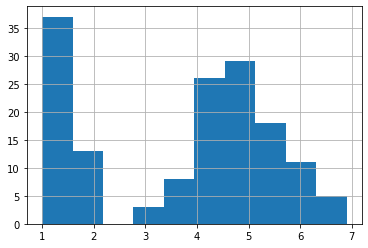

In [26]:
df1['PetalLengthCm'].hist()

In [27]:
df1['Species'].unique

<bound method Series.unique of 0         Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
30        Iris-setosa
            ...      
119    Iris-virginica
120    Iris-virginica
121    Iris-virginica
111    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object>

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

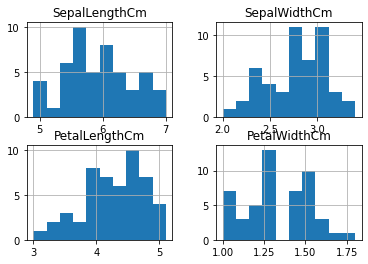

In [28]:
df1[df1['Species'] == 'Iris-versicolor'].hist()

In [29]:
df1.groupby("Species").mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [30]:
import seaborn as sns
sns.set()

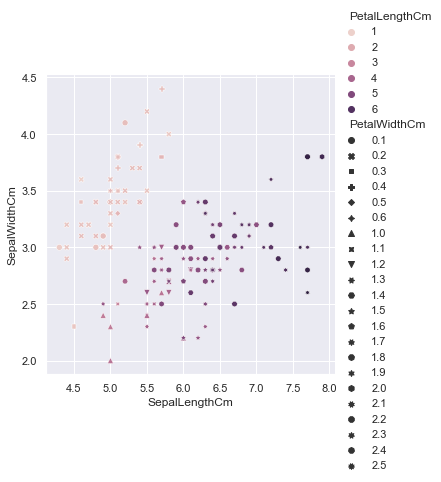

In [31]:
sns.relplot(x='SepalLengthCm', y='SepalWidthCm', hue='PetalLengthCm', style='PetalWidthCm', data=df1)

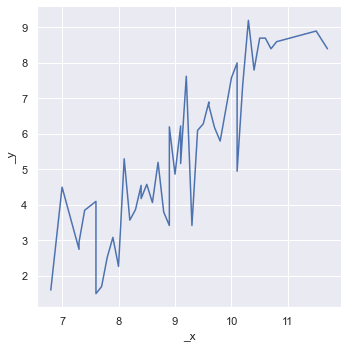

In [32]:
sns.relplot(x=df1['SepalLengthCm'] + df1['SepalWidthCm'], y=df1['PetalLengthCm'] + df1['PetalWidthCm'], ci=None, kind='line', data=df1)

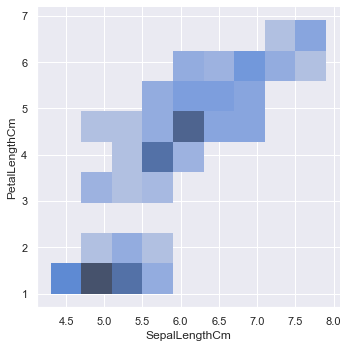

In [33]:
sns.displot(x='SepalLengthCm', y='PetalLengthCm', data=df1)

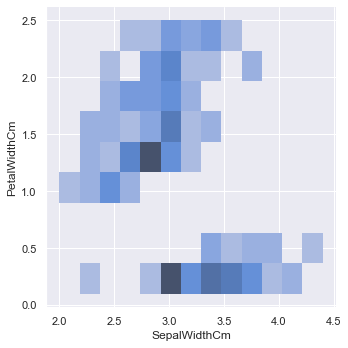

In [34]:
sns.displot(x='SepalWidthCm', y='PetalWidthCm', data=df1)

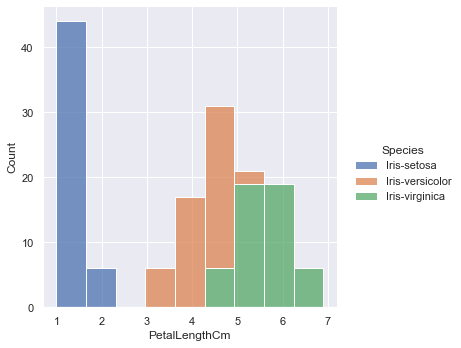

In [35]:
sns.displot(x="PetalLengthCm", hue="Species", multiple="stack", data=df1)

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt

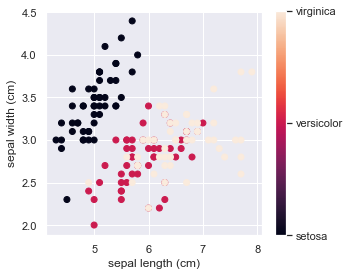

In [37]:
iris = load_iris() 

x_index = 0
y_index = 1

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

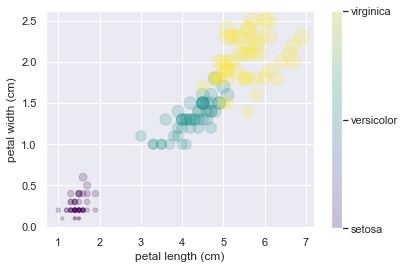

In [39]:
features = sklearn_iris_dataset.data.T

feature_names = sklearn_iris_dataset.feature_names
target_names = sklearn_iris_dataset.target_names


formatter = plt.FuncFormatter(lambda i, *args: sklearn_iris_dataset.target_names[int(i)])


plt.scatter(features[2], features[3], alpha=0.2, s=100*features[3], c=sklearn_iris_dataset.target, cmap='viridis')
plt.xlabel(sklearn_iris_dataset.feature_names[2])
plt.ylabel(sklearn_iris_dataset.feature_names[3])
plt.colorbar(ticks=[0,1,2], format=formatter)

In [40]:
features

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

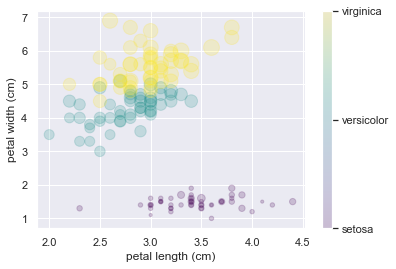

In [47]:
plt.scatter(features[1], features[2], alpha=0.2, s=100*features[3], c=sklearn_iris_dataset.target, cmap='viridis')
plt.xlabel(sklearn_iris_dataset.feature_names[2])
plt.ylabel(sklearn_iris_dataset.feature_names[3])
plt.colorbar(ticks=[0,1,2], format=formatter)